## 1. 라이브러리 & 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [41]:
df_Card = pd.read_csv('./CARD_SPENDING_RESIDENT.txt',sep='\t',engine='python',encoding='cp949')
df_Deli = pd.read_excel('./2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx',sheet_name='Sheet1',encoding='cp494')
df_Combi = df_Card.copy()
df_Combi2 = df_Deli.copy()

## 2. 데이터 전처리

## 2.1 신한카드 데이터 정리하기
* 필요한 데이터를 뽑아 새로운 표를 작성하기
* 새로운 표를 기준으로 물류데이터를 추가하기

In [37]:
df_Combi.head(5)

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433


In [42]:
df_Combi = df_Combi.drop(['USE_CNT','SEX_CD','AGE_CD'],axis=1)
df_Combi['YEAR'] = df_Combi['STD_DD'].map(lambda x:str(x)[0:4])
df_Combi['YE_MO'] = df_Combi['STD_DD'].map(lambda x:str(x)[0:6])
df_Combi['MO_D'] = df_Combi['STD_DD'].map(lambda x:str(x)[4:8])
df_Combi.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,USE_AMT,YEAR,YE_MO,MO_D
0,20190201,110,517,10,595,2019,201902,0201
1,20190201,110,517,10,243,2019,201902,0201
2,20190201,110,517,10,27,2019,201902,0201
3,20190201,110,517,10,243,2019,201902,0201
4,20190201,110,517,10,433,2019,201902,0201


* 제일 중요한게 시기별로 동별로 얼마만큼 업종이 성장했는가

In [7]:
df_Combi_local = df_Combi.pivot_table(index=['YE_MO','DONG_CD','GU_CD'],values='USE_AMT', columns ='MCT_CAT_CD',aggfunc='sum').reset_index()
df_Combi_local

MCT_CAT_CD,YE_MO,DONG_CD,GU_CD,10,20,21,22,30,31,32,...,44,50,52,60,62,70,71,80,81,92
0,201902,510,260,232212.0,NaN,364408.0,1080787.0,NaN,NaN,NaN,...,13763.0,23546.0,6359.0,329542.0,40677.0,2814362.0,400212.0,2520762.0,350843.0,19253.0
1,201902,517,110,47459.0,16880.0,69516.0,8354.0,1188.0,10987.0,4457.0,...,1206.0,31292.0,20564.0,768.0,118613.0,2608766.0,114409.0,1455567.0,94071.0,25415.0
2,201902,520,140,4141330.0,34221.0,405595.0,149260.0,1656.0,NaN,2264.0,...,294415.0,85981.0,419822.0,NaN,1109347.0,16833580.0,549321.0,45461006.0,385518.0,14804.0
3,201902,520,260,NaN,107679.0,307386.0,36512.0,28503.0,18048.0,63032.0,...,2666.0,123730.0,12005041.0,NaN,101786.0,1117890.0,221327.0,1202703.0,206819.0,10172.0
4,201902,530,260,25489.0,11761.0,234707.0,25298.0,NaN,NaN,NaN,...,37410.0,45302.0,1903.0,NaN,26008.0,1936250.0,107196.0,1998705.0,220933.0,21024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,202005,690,260,NaN,131809.0,133929.0,80337.0,26705.0,12953.0,7603.0,...,1970.0,59046.0,9101.0,31290.0,45358.0,986598.0,377307.0,1516424.0,831021.0,30597.0
548,202005,695,350,289690.0,353859.0,471287.0,75678.0,NaN,NaN,45731.0,...,120157.0,390227.0,23032.0,NaN,22829.0,12270304.0,1080426.0,4674239.0,768573.0,50636.0
549,202005,700,350,NaN,60170.0,104187.0,38585.0,59297.0,NaN,NaN,...,19740.0,18345.0,NaN,NaN,4727.0,871451.0,149050.0,564499.0,179073.0,57063.0
550,202005,710,350,NaN,5892.0,42833.0,15852.0,NaN,NaN,NaN,...,4289.0,40325.0,383.0,NaN,NaN,751070.0,185763.0,674183.0,247908.0,18999.0


In [8]:
df_Combi_local.isnull().sum()

MCT_CAT_CD
YE_MO        0
DONG_CD      0
GU_CD        0
10         229
20          25
21           4
22           6
30         249
31         343
32         211
33         170
34          98
35         227
40           3
42           1
43         137
44          49
50           3
52          40
60         264
62          23
70           0
71           0
80           0
81           0
92           8
dtype: int64

### * 각 동에 따른 분류

### {{ 1. 중구 }} GU_CD : 140

In [43]:
df_Combi_SJ = df_Combi[df_Combi['GU_CD']==140].drop('GU_CD',axis=1)
df_Combi_SJ

,STD_DD,DONG_CD,MCT_CAT_CD,USE_AMT,YEAR,YE_MO,MO_D
1656,20190201,520,10,1038,2019,201902,0201
1657,20190201,520,10,4635,2019,201902,0201
1658,20190201,520,10,3046,2019,201902,0201
1659,20190201,520,10,5995,2019,201902,0201
1660,20190201,520,10,5172,2019,201902,0201
...,...,...,...,...,...,...,...
2531944,20200531,680,81,948,2020,202005,0531
2531945,20200531,680,81,1059,2020,202005,0531
2531946,20200531,680,81,1666,2020,202005,0531
2531947,20200531,680,81,644,2020,202005,0531


#### [ 1. 520 ] : 서울 중구 소공동

In [44]:
df_Combi_SJ520 = df_Combi_SJ[df_Combi_SJ['DONG_CD']==520]
df_Combi_SJ520

,STD_DD,DONG_CD,MCT_CAT_CD,USE_AMT,YEAR,YE_MO,MO_D
1656,20190201,520,10,1038,2019,201902,0201
1657,20190201,520,10,4635,2019,201902,0201
1658,20190201,520,10,3046,2019,201902,0201
1659,20190201,520,10,5995,2019,201902,0201
1660,20190201,520,10,5172,2019,201902,0201
...,...,...,...,...,...,...,...
2529693,20200531,520,81,277,2020,202005,0531
2529694,20200531,520,81,117,2020,202005,0531
2529695,20200531,520,81,342,2020,202005,0531
2529696,20200531,520,81,312,2020,202005,0531


In [47]:
SJ520 = df_Combi_SJ520.pivot_table(index=['YEAR','YE_MO','MCT_CAT_CD','MO_D'],values='USE_AMT',aggfunc='sum').reset_index()
SJ520_19 = SJ520[SJ520['YEAR']=='2019']
SJ520_20 = SJ520[SJ520['YEAR']=='2020']
#SJ520_20 = SJ520[SJ520['YEAR']=='2020'].append({'YEAR' : '2020', 'YE_MO' : '202003','MCT_CAT_CD' : 43, 'USE_AMT' : 0 },ignore_index=True)

In [61]:
SJ520_19.

,YEAR,YE_MO,MCT_CAT_CD,MO_D,USE_AMT
0,2019,201902,10,0201,115004
1,2019,201902,10,0202,146840
2,2019,201902,10,0203,188649
3,2019,201902,10,0204,185323
4,2019,201902,10,0205,172738
...,...,...,...,...,...
2114,2019,201905,92,0527,213
2115,2019,201905,92,0528,1022
2116,2019,201905,92,0529,469
2117,2019,201905,92,0530,209


In [60]:
SJ520_20

,YEAR,YE_MO,MCT_CAT_CD,MO_D,USE_AMT
2119,2020,202002,10,0201,149683
2120,2020,202002,10,0202,103346
2121,2020,202002,10,0203,55424
2122,2020,202002,10,0204,102407
2123,2020,202002,10,0205,85286
...,...,...,...,...,...
4235,2020,202005,92,0526,716
4236,2020,202005,92,0527,192
4237,2020,202005,92,0528,444
4238,2020,202005,92,0529,877


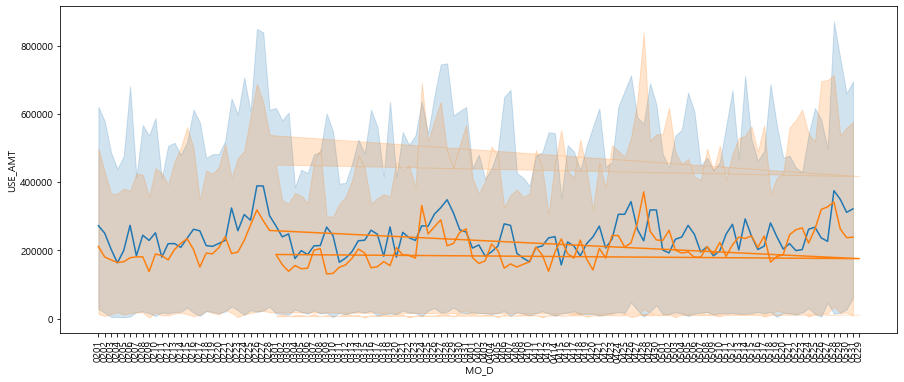

In [50]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.lineplot(data = SJ520_19, x='MO_D', y='USE_AMT')
sns.lineplot(data = SJ520_20, x='MO_D', y='USE_AMT')

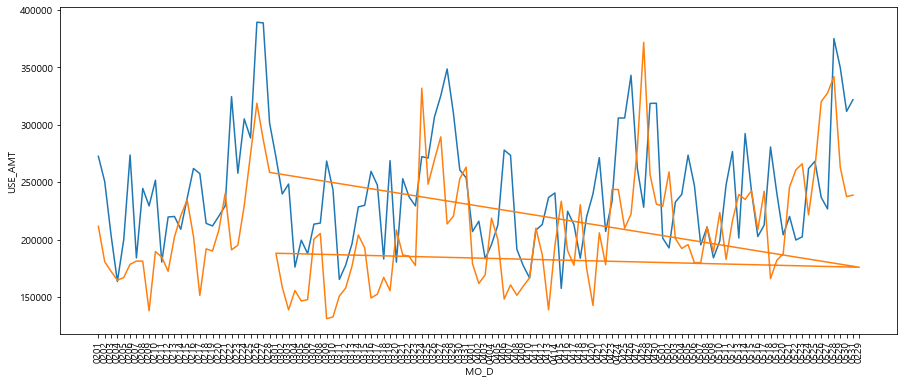

In [53]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.lineplot(data = SJ520_19, x='MO_D', y='USE_AMT',ci=None)
sns.lineplot(data = SJ520_20, x='MO_D', y='USE_AMT',ci=None)

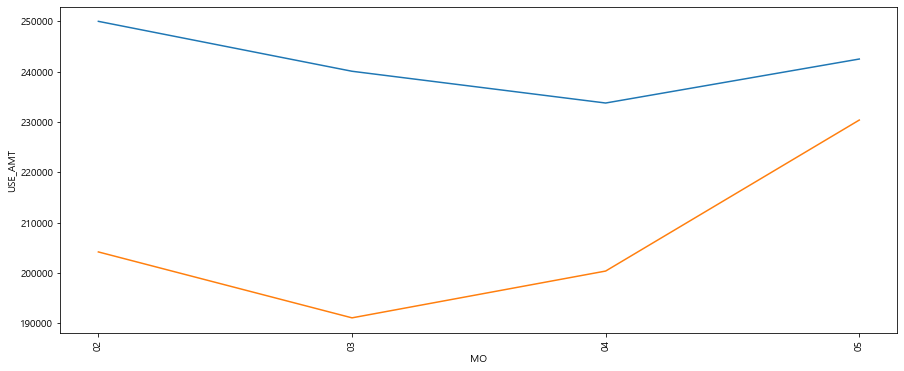

In [58]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
SJ520_19_a = SJ520_19.copy()
SJ520_20_a = SJ520_20.copy()
SJ520_19_a['MO'] = SJ520_19['YE_MO'].map(lambda x:str(x)[4:6])
SJ520_20_a['MO'] = SJ520_20['YE_MO'].map(lambda x:str(x)[4:6])
sns.lineplot(data = SJ520_19_a, x='MO', y='USE_AMT',ci=None)
sns.lineplot(data = SJ520_20_a, x='MO', y='USE_AMT',ci=None)

In [ ]:
SJ520_20 = SJ520_20.sort_values(['YE_MO','MCT_CAT_CD'] ).reset_index().drop('index', axis=1)
df_Combi_SJ520_Result = SJ520_19.drop(['YEAR','YE_MO','USE_AMT'],axis=1).copy()
df_Combi_SJ520_Result['MCT_CAT_CD'] = SJ520_19['MCT_CAT_CD']
df_Combi_SJ520_Result['Subtract']=(SJ520_20['USE_AMT'] - SJ520_19['USE_AMT']) / SJ520_19['USE_AMT'] * 100 # 이 기준을 유통데이터를 가져와야 할 것같음
df_Combi_SJ520_Result['MO']=SJ520_19['YE_MO'].map(lambda x : str(x)[4:6])
df_Combi_SJ520_Result

(-150, 1500)

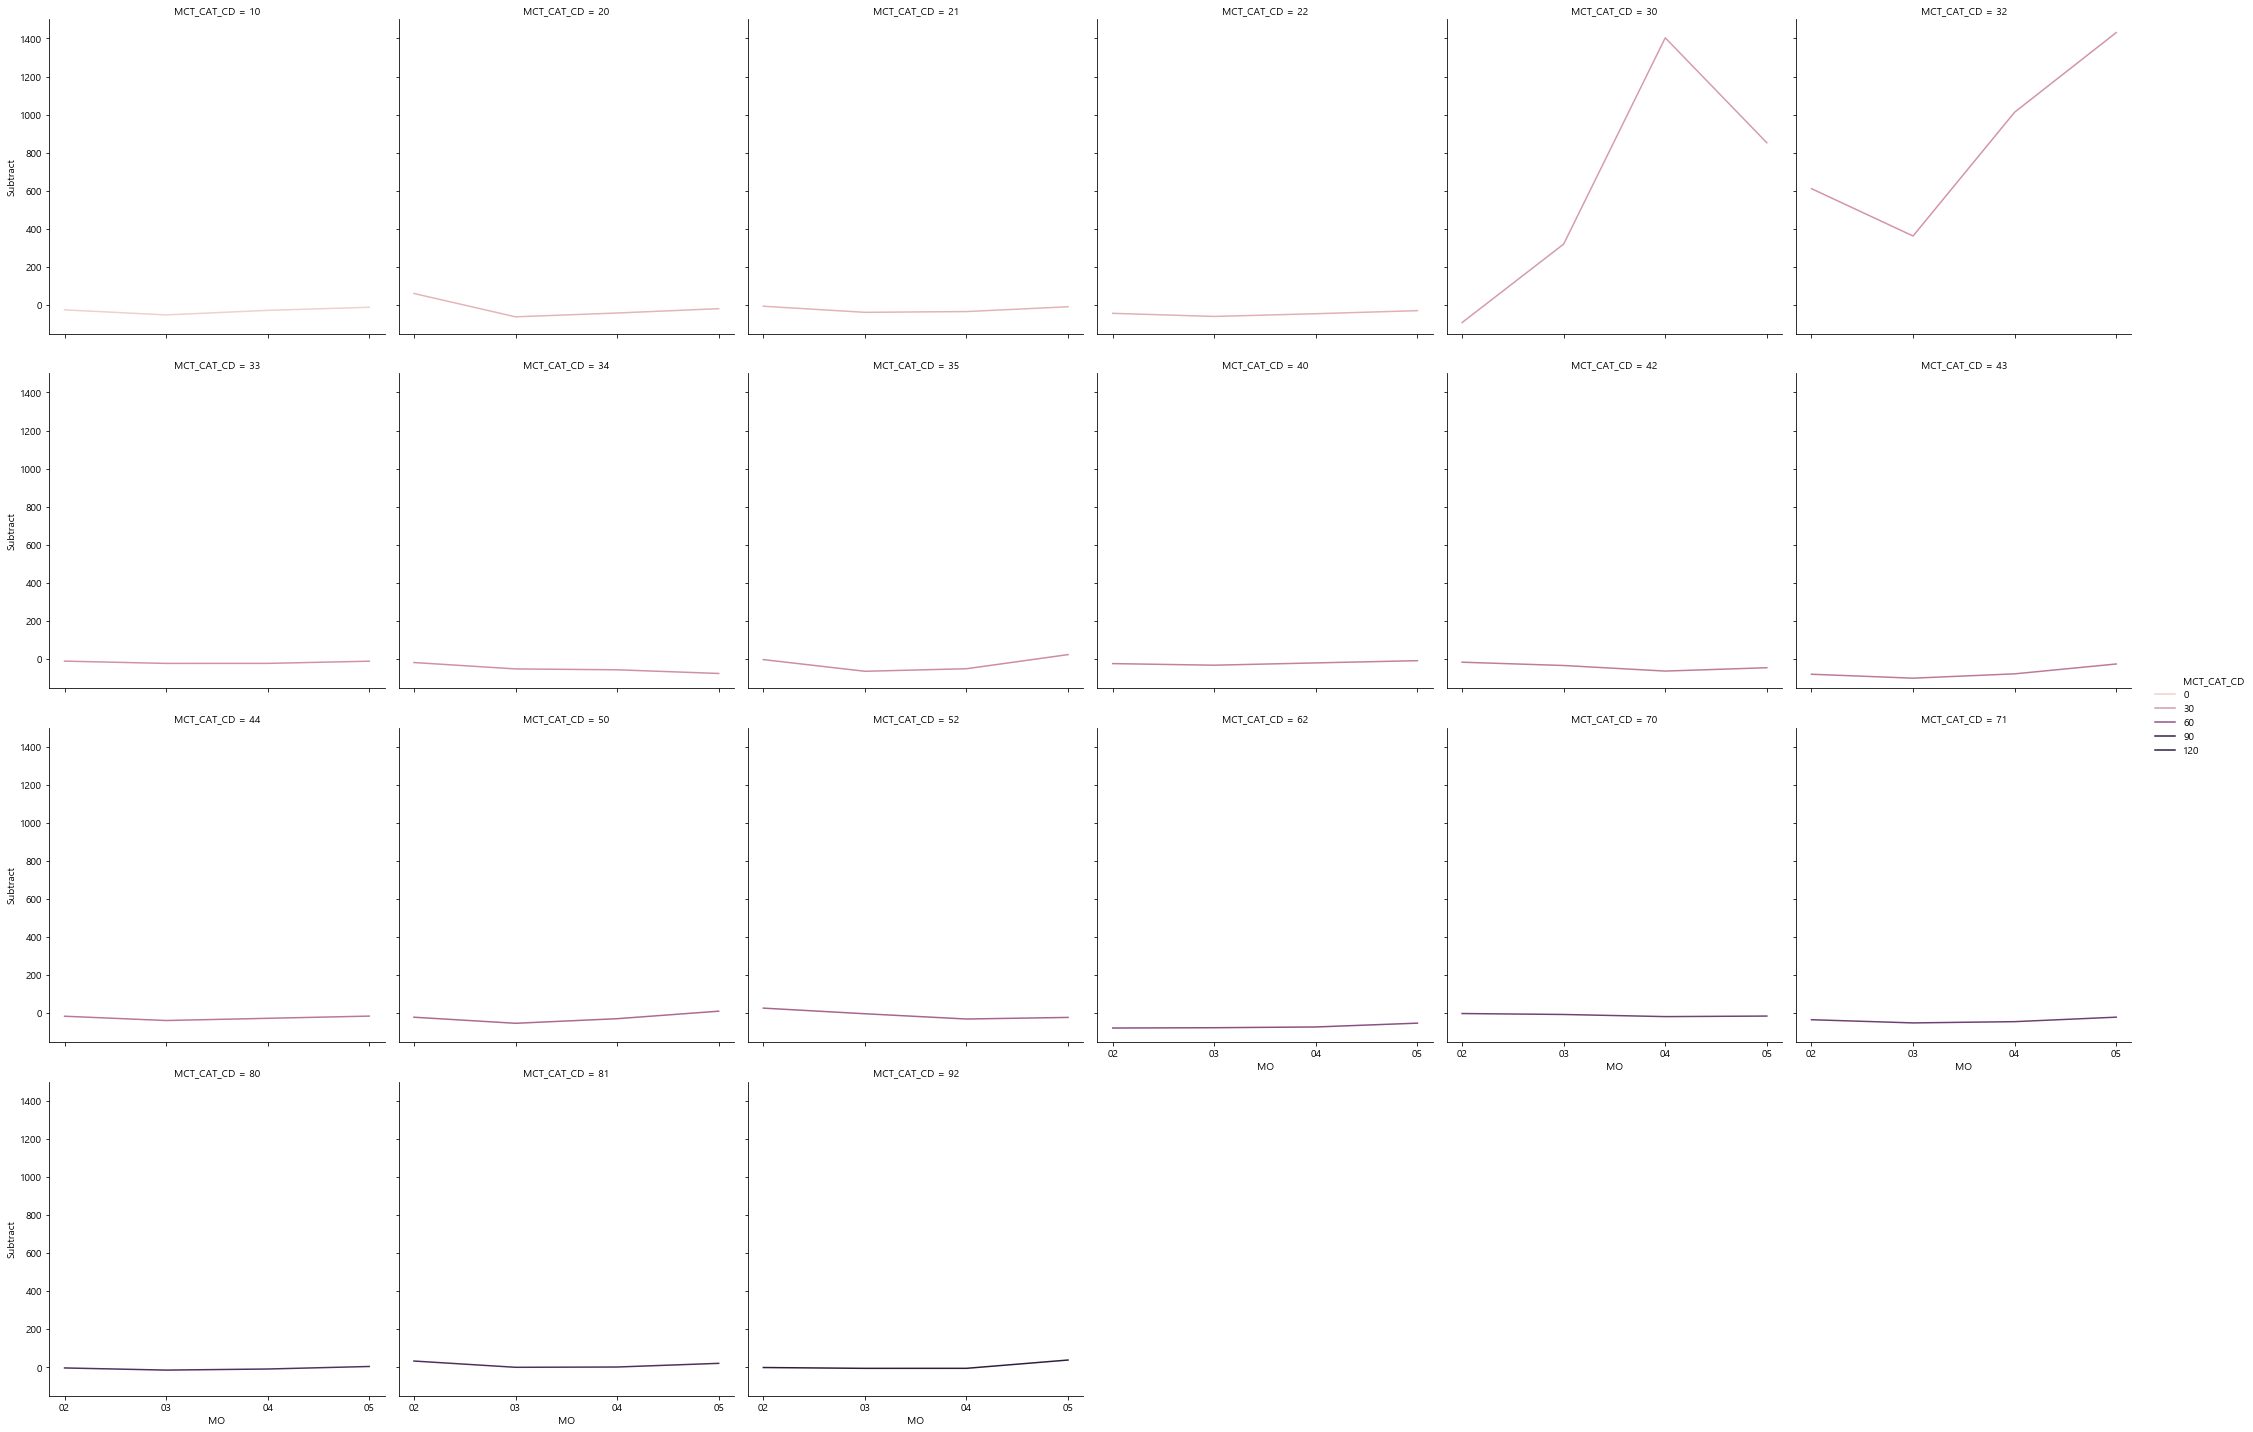

In [13]:
sns.relplot(data=df_Combi_SJ520_Result,x='MO',y='Subtract',hue='MCT_CAT_CD',kind='line',col='MCT_CAT_CD',col_wrap=6)
plt.ylim(-150,1500)

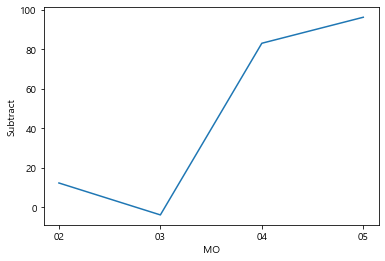

In [14]:
sns.lineplot(data=df_Combi_SJ520_Result,x='MO',y='Subtract',ci=None)

In [ ]:
df_Combi_SJ520_Result.to_csv('Card_SJ520.csv')

## 2.2 물류데이티 정리하기
* 먼저 물류데이터를 신한카드 코드별로 정리하기

In [15]:
df_Combi2['DL_YM'] = df_Combi2['DL_YMD'].map(lambda x : str(x)[0:4])
df_Combi2['DL_Y'] = df_Combi2['DL_YMD'].map(lambda x : str(x)[0:2])
columns = ['DL_GD_LCLS_NM', 'DL_GD_LCLS_CD','CTGG_CD', 'HDNG_NM', 'HDNG_CD', 'INVC_CONT', 'DL_YM','DL_Y']
df_Combi2 = df_Combi2[columns]
df_Combi2

,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT,DL_YM,DL_Y
0,도서/음반,12,14,동화동,665,16,1902,19
1,가구/인테리어,10,14,신당동,615,4,1902,19
2,가구/인테리어,10,11,성내1동,565,1,1902,19
3,도서/음반,12,11,남산2동,650,6,1902,19
4,디지털/가전,13,26,고산3동,690,21,1902,19
...,...,...,...,...,...,...,...,...
156566,패션의류,19,26,범물2동,662,22,2005,20
156567,패션의류,19,14,약수동,635,21,2005,20
156568,패션잡화,20,26,범물2동,662,14,2005,20
156569,패션잡화,20,35,상계6.7동,695,25,2005,20


### {{ 1. 중구 }} CTPV_CD : 14

In [16]:
df_Combi2_SJ = df_Combi2[df_Combi2['CTGG_CD']==14]
df_Combi2_SJ

,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT,DL_YM,DL_Y
0,도서/음반,12,14,동화동,665,16,1902,19
1,가구/인테리어,10,14,신당동,615,4,1902,19
5,도서/음반,12,14,회현동,540,25,1902,19
7,디지털/가전,13,14,황학동,670,14,1902,19
13,가구/인테리어,10,14,약수동,635,4,1902,19
...,...,...,...,...,...,...,...,...
156556,화장품/미용,21,14,필동,570,8,2005,20
156558,패션잡화,20,14,장충동,580,5,2005,20
156561,화장품/미용,21,14,다산동,625,15,2005,20
156563,패션잡화,20,14,명동,550,9,2005,20


#### [ 1. 520 ] : 서울 중구 소공동

In [17]:
df_Combi2_SJ520 = df_Combi2_SJ[df_Combi2_SJ['HDNG_CD']==520].drop(['CTGG_CD','HDNG_NM','HDNG_CD'],axis=1)
df_Combi2_SJ520 

,DL_GD_LCLS_NM,DL_GD_LCLS_CD,INVC_CONT,DL_YM,DL_Y
53,도서/음반,12,48,1902,19
113,가구/인테리어,10,3,1902,19
128,디지털/가전,13,35,1902,19
468,화장품/미용,21,26,1902,19
525,생활건강,15,15,1902,19
...,...,...,...,...,...
156313,생활건강,15,8,2005,20
156383,디지털/가전,13,1,2005,20
156385,패션의류,19,12,2005,20
156506,패션잡화,20,10,2005,20


In [18]:
df_Combi2_SJ520 = df_Combi2_SJ520.pivot_table(index=['DL_YM','DL_GD_LCLS_CD','DL_Y','DL_GD_LCLS_NM'],values='INVC_CONT' ,aggfunc='sum').reset_index()
df_Combi2_SJ520_19 = df_Combi2_SJ520[df_Combi2_SJ520['DL_Y']=='19'].drop('DL_Y',axis=1).reset_index().drop('index',axis=1)
df_Combi2_SJ520_20 = df_Combi2_SJ520[df_Combi2_SJ520['DL_Y']=='20'].drop('DL_Y',axis=1).reset_index().drop('index',axis=1)
df_Combi2_SJ520_Result = df_Combi2_SJ520_19.copy()
df_Combi2_SJ520_Result['M'] = df_Combi2_SJ520_Result['DL_YM'].map(lambda x : str(x)[2:4])
df_Combi2_SJ520_Result['Subtract'] = (df_Combi2_SJ520_20['INVC_CONT'] - df_Combi2_SJ520_19['INVC_CONT']) / df_Combi2_SJ520_19['INVC_CONT'] * 100
df_Combi2_SJ520_Result = df_Combi2_SJ520_Result.drop(['DL_YM','INVC_CONT'],axis=1)
df_Combi2_SJ520_Result
## 업종코드 -> 신한카드에 맞추기
## 그 강도를 어떻게 맞출지

,DL_GD_LCLS_CD,DL_GD_LCLS_NM,M,Subtract
0,10,가구/인테리어,02,12.046908
1,12,도서/음반,02,20.330237
2,13,디지털/가전,02,21.220021
3,15,생활건강,02,59.534278
4,16,스포츠/레저,02,7.816712
5,17,식품,02,45.058005
6,18,출산/육아,02,-31.746032
7,19,패션의류,02,36.895353
8,20,패션잡화,02,-1.933453
9,21,화장품/미용,02,15.856444


In [19]:
df_Combi2_SJ520_Result[df_Combi2_SJ520_Result['DL_GD_LCLS_CD']==15]
## 우리는 2월 3월에 대체적으로 코로나 경각심에 따라 보다 배달을 많이 했음을 유추할 수 있다

,DL_GD_LCLS_CD,DL_GD_LCLS_NM,M,Subtract
3,15,생활건강,02,59.534278
13,15,생활건강,03,27.630897
23,15,생활건강,04,0.012960
33,15,생활건강,05,1.548029


In [20]:
print(df_Combi2_SJ520_19[df_Combi2_SJ520_19['DL_GD_LCLS_CD']==19])
print(df_Combi2_SJ520_20[df_Combi2_SJ520_20['DL_GD_LCLS_CD']==19])
df_Combi2_SJ520_Result[df_Combi2_SJ520_Result['DL_GD_LCLS_CD']==19]

   DL_YM  DL_GD_LCLS_CD DL_GD_LCLS_NM  INVC_CONT
7   1902             19          패션의류       3163
17  1903             19          패션의류       4164
27  1904             19          패션의류       4707
37  1905             19          패션의류       4617
   DL_YM  DL_GD_LCLS_CD DL_GD_LCLS_NM  INVC_CONT
7   2002             19          패션의류       4330
17  2003             19          패션의류       4216
27  2004             19          패션의류       4138
37  2005             19          패션의류       4605


,DL_GD_LCLS_CD,DL_GD_LCLS_NM,M,Subtract
7,19,패션의류,02,36.895353
17,19,패션의류,03,1.248799
27,19,패션의류,04,-12.088379
37,19,패션의류,05,-0.259909


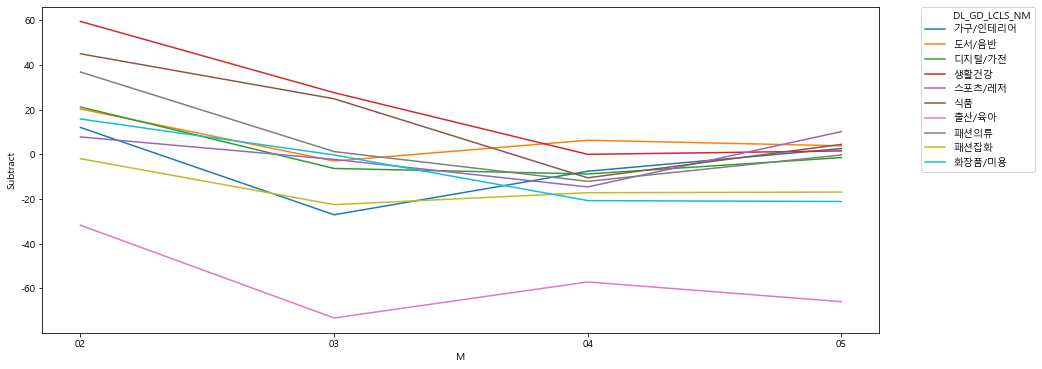

In [21]:
plt.figure(figsize=(15,6))
sns.lineplot(data = df_Combi2_SJ520_Result,x = 'M',y='Subtract',hue='DL_GD_LCLS_NM')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
#plt.ylim(-1000,10000)
# 제일 크게 생활 건강 쪽에서 배달을 많이 시켰음 -> 생활용품
# 식품 쪽도 많이 증가했음

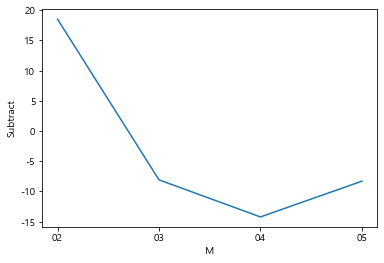

In [22]:
sns.lineplot(data = df_Combi2_SJ520_Result,x = 'M',y='Subtract',ci=None)
# 4월 중으로 감소한 경향

In [23]:
def verify (num):
    if (num==10):
        # 이것도 다시 나눠야 함
        answer=30
    elif (num==12):
        answer=50
    elif (num==13):
        answer=35
    elif (num==15):
        # 생활건강도 다시 나눠야 할 필요가 있음 -> 비율로 나누자는 것
        answer=32
    elif (num==16):
        answer=21
    elif (num==17):
        # 식품은 그냥 유통업이 아닌 음료식품으로 넣었음
        answer=81
    elif (num==18):
        # 출산 육아는 없어서 그냥 93번 업종으로 따로 분류해놓음
        answer=93
    elif (num==19):
        answer=42
    elif (num==20):
        answer=44
    elif (num==21):
        answer=71
    return answer

In [25]:
df_Combi2_SJ520_Result['MCT_CAT_CD'] = df_Combi2_SJ520_Result['DL_GD_LCLS_CD'].map(lambda x : verify(x))
df_Combi2_SJ520_Result.drop('DL_GD_LCLS_NM',axis=1).to_csv('Deli_SJ520.csv')
df_Combi2_SJ520_Result

,DL_GD_LCLS_CD,DL_GD_LCLS_NM,M,Subtract,MCT_CAT_CD
0,10,가구/인테리어,02,12.046908,30
1,12,도서/음반,02,20.330237,50
2,13,디지털/가전,02,21.220021,35
3,15,생활건강,02,59.534278,32
4,16,스포츠/레저,02,7.816712,21
5,17,식품,02,45.058005,81
6,18,출산/육아,02,-31.746032,93
7,19,패션의류,02,36.895353,42
8,20,패션잡화,02,-1.933453,44
9,21,화장품/미용,02,15.856444,71


In [ ]:
## 기간을 월별로 했어야 했는지 아님 기간별로 자세하게 분류해서 했어야 했던건지?
## (( 주차별 ))로
## '업종에 대해' << 구 >>  -> 주차별
## 